In [1]:
#Imports
import pandas as pd
from pandas import DataFrame, Series
from pandas.tseries.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import json

import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import HTML
import folium
from wordcloud import WordCloud, STOPWORDS

from scipy.misc import imread

import nltk

/home/smutuvi/miniconda3/envs/analysis/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
path = 'data/IGF_2015_cleantext_2.csv'
IGF_2015 = pd.read_csv(path)
IGF_2015.head(5)

,Unnamed: 0,created_at,CleanText,CleanSource,lang
0,0,Wed Nov 11 10:49:23 +0000 2015,nov en el igf itandnetworking presenta politic...,twitter android,es
1,1,Wed Nov 11 10:49:25 +0000 2015,nov en el igf itandnetworking presenta politic...,linkis com,es
2,2,Wed Nov 11 10:49:37 +0000 2015,undesa undesa wu hongbo says icts useful devel...,mobile web m,en
3,3,Wed Nov 11 10:50:06 +0000 2015,comunicbr acompanhe agora confer ncia anoscgib...,twitter android,pt
4,4,Wed Nov 11 10:50:13 +0000 2015,isocpolicy wondering igf get updates co tezuti...,twitter web client,en


In [3]:
IGF_2015.columns

Index(['Unnamed: 0', 'created_at', 'CleanText', 'CleanSource', 'lang'], dtype='object')

In [4]:
lang_counts = IGF_2015.lang.value_counts()
lang_counts_max = lang_counts[0:5]

In [5]:
lang_counts_max.head()

en     3169
es      202
pt      130
und      77
fr       36
Name: lang, dtype: int64

In [6]:
cleansource_counts = IGF_2015.CleanSource.value_counts()
cleansource_counts_max = cleansource_counts[0:10]

In [7]:
cleansource_counts_max.head(10)

twitter web client       1218
tweetdeck                 852
twitter android           635
twitter iphone            370
twitter ipad              111
hootsuite                 109
ifttt                      52
twitter windows phone      52
roundteam                  52
mobile web m               36
Name: CleanSource, dtype: int64

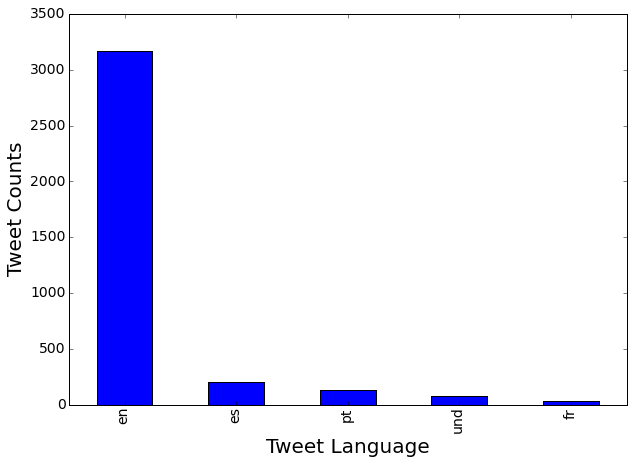

In [8]:
fig, ax = plt.subplots()
lang_counts_max.plot(legend=False,figsize=(10,7), kind = 'bar')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Tweet Language',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')
plt.grid(False)
plt.show()

In [15]:
IGF_2015.columns

Index(['Unnamed: 0', 'created_at', 'CleanText', 'CleanSource', 'lang'], dtype='object')

In [16]:
IGF_2015['datetime'] = IGF_2015['created_at']
IGF_2015.drop(['created_at'], inplace=True, axis=1)

In [17]:
IGF_2015['datetime'] = pd.to_datetime(pd.Series(IGF_2015['datetime']))
IGF_2015.set_index('datetime', drop=False, inplace=True)
IGF_2015.index = IGF_2015.index.tz_localize('UTC').tz_convert('EST')
IGF_2015.index = IGF_2015.index - DateOffset(hours = 12)
IGF_2015.index
IGF_2015.head()

,Unnamed: 0,CleanText,CleanSource,lang,datetime
datetime,,,,,
2015-11-10 17:49:23-05:00,0,nov en el igf itandnetworking presenta politic...,twitter android,es,2015-11-11 10:49:23
2015-11-10 17:49:25-05:00,1,nov en el igf itandnetworking presenta politic...,linkis com,es,2015-11-11 10:49:25
2015-11-10 17:49:37-05:00,2,undesa undesa wu hongbo says icts useful devel...,mobile web m,en,2015-11-11 10:49:37
2015-11-10 17:50:06-05:00,3,comunicbr acompanhe agora confer ncia anoscgib...,twitter android,pt,2015-11-11 10:50:06
2015-11-10 17:50:13-05:00,4,isocpolicy wondering igf get updates co tezuti...,twitter web client,en,2015-11-11 10:50:13


In [18]:
IGF_20151m = IGF_2015['datetime'].resample('1Min', how='count')
IGF_20151m.index = IGF_20151m.index.tz_convert('Africa/Nairobi')
#IGF_20151m = IGF_2015['datetime']
#IGF_20151m.index = IGF_20151m.index.tz_convert('EST')

In [19]:
IGF_20151m.tail()

datetime
2015-11-11 06:25:00+03:00    21
2015-11-11 06:26:00+03:00    18
2015-11-11 06:27:00+03:00    20
2015-11-11 06:28:00+03:00    15
2015-11-11 06:29:00+03:00    12
Freq: T, Name: datetime, dtype: int64

13.1601423488


/home/smutuvi/miniconda3/envs/analysis/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


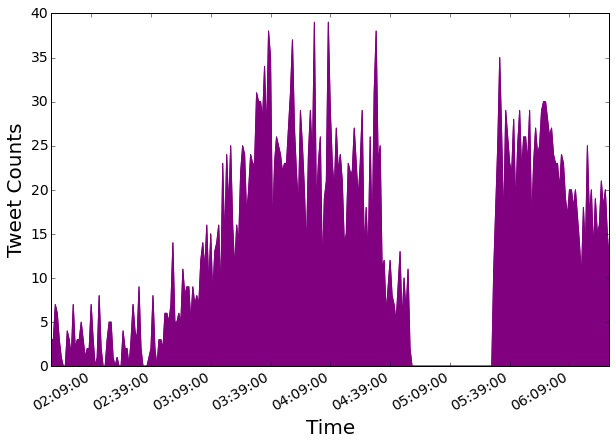

In [20]:
avg = IGF_20151m.mean()
print (avg) 

fig, ax = plt.subplots()
#IGF_20151m.index = IGF_20151m.index.tz_convert('EST')
IGF_20151m.plot(legend=False,figsize=(10,7), kind = 'area', color = 'purple')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Time',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')
# Now add the start and end markers for each quarter
plt.axvline(x='2015-05-21 10:40:00-16:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 11:20:00-05:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 12:00:00-05:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 12:40:00-05:00', linewidth=4, color='grey')
plt.axvline(x='2015-05-21 13:20:00-05:00', linewidth=4, color='grey')
plt.grid(False)
plt.show()

In [21]:
source_counts = IGF_2015.CleanSource.value_counts()
source_counts_max = source_counts[0:10]

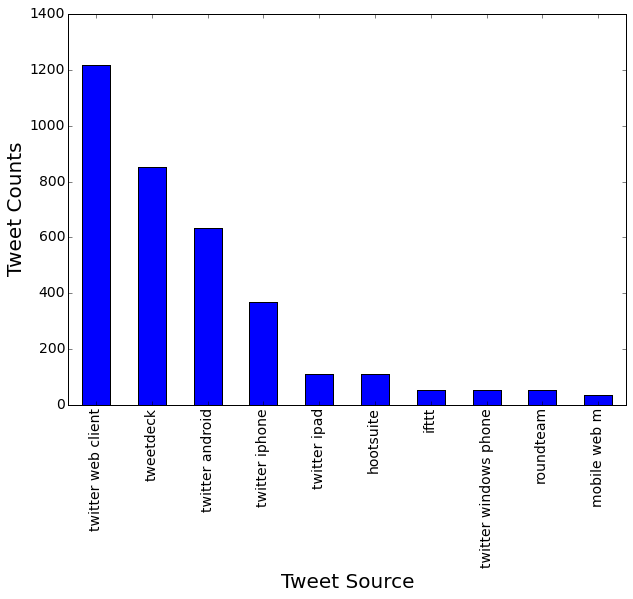

In [22]:
fig, ax = plt.subplots()
source_counts_max.plot(legend=False,figsize=(10,7), kind = 'bar')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Tweet Source',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')
plt.grid(False)
plt.show()

/home/smutuvi/miniconda3/envs/analysis/lib/python3.5/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


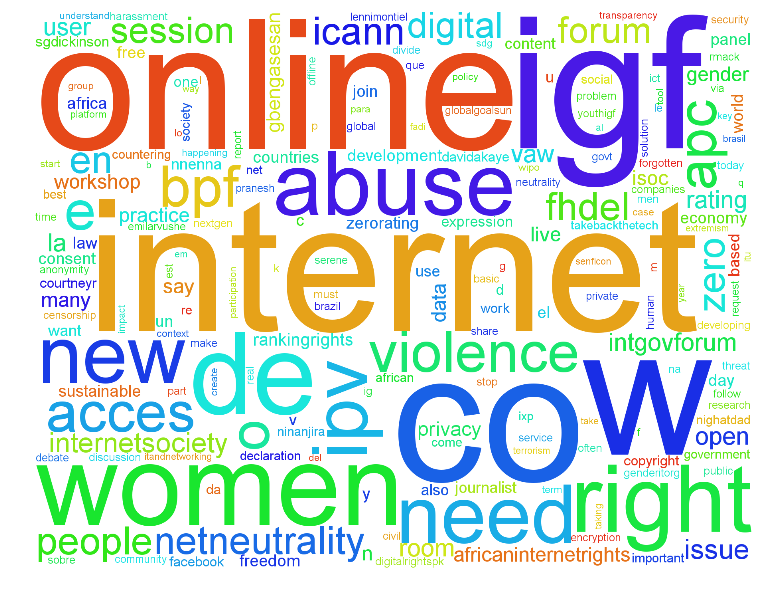

In [23]:
# join tweets to a single string
words = ' '.join(IGF_2015['CleanText'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
#twitter_mask = imread('/Users/Deepna/Pictures/twitter_mask.png', flatten=True)

plt.figure(num=None, figsize=(15, 10), dpi=300)
wordcloud = WordCloud(
                      font_path='/Library/Fonts/Arial.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                     # mask=twitter_mask
            ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud_2.png', dpi=300)
plt.show()

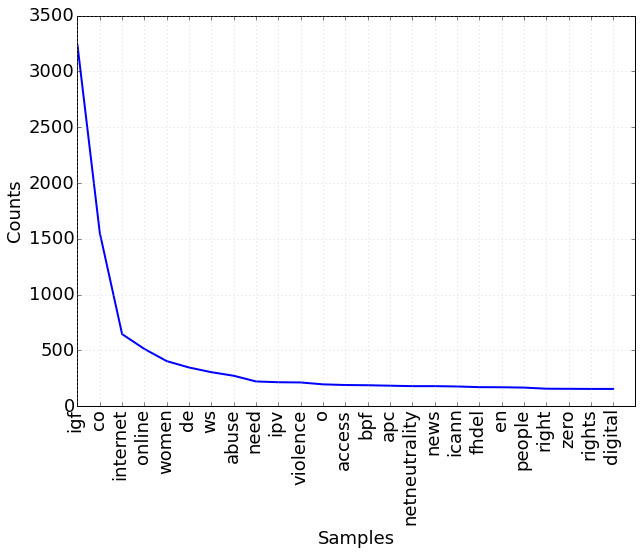

In [24]:
tokens = []
for tweet in IGF_2015['CleanText']:
    for word in nltk.word_tokenize(tweet):
        tokens.append(word)
tokens[:10]
freq_dist = nltk.FreqDist(tokens)
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
freq_dist.plot(25)